### 🆕 불필요한 feature 삭제해보기 (3 cycle)

In [1]:
import pandas as pd

r_df = pd.read_csv('./datasets/Real estate.csv')
r_df

No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 390.56840                                5   
..                                      ...                              ...   
409                              4082.01500                                0   
410                                90.45606                                9   
411                               390.96960                                7   
412                               104.81010                                5   
413                                90.45606                                9   

     X5 latitude  X6 longitude  Y house price of unit area  
0       24.98298     121.54024                        37.9  
1       24.98034     121.53951                        42.2  
2       24.98746     121.54391                        47.3  
3       24.98746     121.54391                        54.8  
4       24.97937     121.54245                        43.1  
..           ...           ...                         ...  
409     24.94155     121.50381                        15.4  
410     24.97433     121.54310                        50.0  
411     24.97923     121.53986                        40.6  
412     24.96674     121.54067                        52.5  
413     24.97433     121.54310                        63.9  

[414 rows x 8 columns]

In [2]:
pre_r_df = r_df.drop(labels=['No'], axis=1)
pre_r_df

X1 transaction date  X2 house age  \
0               2012.917          32.0   
1               2012.917          19.5   
2               2013.583          13.3   
3               2013.500          13.3   
4               2012.833           5.0   
..                   ...           ...   
409             2013.000          13.7   
410             2012.667           5.6   
411             2013.250          18.8   
412             2013.000           8.1   
413             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 390.56840                                5   
..                                      ...                              ...   
409                              4082.01500                                0   
410                                90.45606                                9   
411                               390.96960                                7   
412                               104.81010                                5   
413                                90.45606                                9   

     X5 latitude  X6 longitude  Y house price of unit area  
0       24.98298     121.54024                        37.9  
1       24.98034     121.53951                        42.2  
2       24.98746     121.54391                        47.3  
3       24.98746     121.54391                        54.8  
4       24.97937     121.54245                        43.1  
..           ...           ...                         ...  
409     24.94155     121.50381                        15.4  
410     24.97433     121.54310                        50.0  
411     24.97923     121.53986                        40.6  
412     24.96674     121.54067                        52.5  
413     24.97433     121.54310                        63.9  

[414 rows x 7 columns]

In [3]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
result = std.fit_transform(pre_r_df)
std_pre_r_df = pd.DataFrame(result, columns=pre_r_df.columns)
std_pre_r_df

X1 transaction date  X2 house age  \
0              -0.823683      1.255628   
1              -0.823683      0.157086   
2               1.541151     -0.387791   
3               1.246435     -0.387791   
4              -1.121951     -1.117223   
..                   ...           ...   
409            -0.528967     -0.352637   
410            -1.711384     -1.064493   
411             0.358734      0.095568   
412            -0.528967     -0.844784   
413             1.246435     -0.985398   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                 -0.792495                         2.007407   
1                                 -0.616612                         1.667503   
2                                 -0.414015                         0.307885   
3                                 -0.414015                         0.307885   
4                                 -0.549997                         0.307885   
..                                      ...                              ...   
409                                2.378365                        -1.391638   
410                               -0.788071                         1.667503   
411                               -0.549678                         0.987694   
412                               -0.776684                         0.307885   
413                               -0.788071                         1.667503   

     X5 latitude  X6 longitude  Y house price of unit area  
0       1.125430      0.448762                   -0.005901  
1       0.912444      0.401139                    0.310507  
2       1.486860      0.688183                    0.685782  
3       1.486860      0.688183                    1.237656  
4       0.834188      0.592937                    0.376732  
..           ...           ...                         ...  
409    -2.216993     -1.927835                   -1.661525  
410     0.427579      0.635341                    0.884457  
411     0.822893      0.423972                    0.192774  
412    -0.184755      0.476814                    1.068415  
413     0.427579      0.635341                    1.907264  

[414 rows x 7 columns]

In [4]:
condition = True

for column in std_pre_r_df.columns:
    condition &= std_pre_r_df[column].between(-1.96, 1.96)

std_pre_r_df = std_pre_r_df[condition]
std_pre_r_df

X1 transaction date  X2 house age  \
1              -0.823683      0.157086   
2               1.541151     -0.387791   
3               1.246435     -0.387791   
4              -1.121951     -1.117223   
5              -1.711384     -0.932668   
..                   ...           ...   
408             0.951718      0.069203   
410            -1.711384     -1.064493   
411             0.358734      0.095568   
412            -0.528967     -0.844784   
413             1.246435     -0.985398   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
1                                 -0.616612                         1.667503   
2                                 -0.414015                         0.307885   
3                                 -0.414015                         0.307885   
4                                 -0.549997                         0.307885   
5                                  0.865586                        -0.371925   
..                                      ...                              ...   
408                                0.866152                        -0.371925   
410                               -0.788071                         1.667503   
411                               -0.549678                         0.987694   
412                               -0.776684                         0.307885   
413                               -0.788071                         1.667503   

     X5 latitude  X6 longitude  Y house price of unit area  
1       0.912444      0.401139                    0.310507  
2       1.486860      0.688183                    0.685782  
3       1.486860      0.688183                    1.237656  
4       0.834188      0.592937                    0.376732  
5      -0.482451     -1.358313                   -0.432684  
..           ...           ...                         ...  
408    -0.462282     -1.365489                   -0.727017  
410     0.427579      0.635341                    0.884457  
411     0.822893      0.423972                    0.192774  
412    -0.184755      0.476814                    1.068415  
413     0.427579      0.635341                    1.907264  

[347 rows x 7 columns]

In [5]:
pre_r_df = pre_r_df.iloc[std_pre_r_df.index].reset_index(drop=True)
pre_r_df

X1 transaction date  X2 house age  \
0               2012.917          19.5   
1               2013.583          13.3   
2               2013.500          13.3   
3               2012.833           5.0   
4               2012.667           7.1   
..                   ...           ...   
342             2013.417          18.5   
343             2012.667           5.6   
344             2013.250          18.8   
345             2013.000           8.1   
346             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                 306.59470                                9   
1                                 561.98450                                5   
2                                 561.98450                                5   
3                                 390.56840                                5   
4                                2175.03000                                3   
..                                      ...                              ...   
342                              2175.74400                                3   
343                                90.45606                                9   
344                               390.96960                                7   
345                               104.81010                                5   
346                                90.45606                                9   

     X5 latitude  X6 longitude  Y house price of unit area  
0       24.98034     121.53951                        42.2  
1       24.98746     121.54391                        47.3  
2       24.98746     121.54391                        54.8  
3       24.97937     121.54245                        43.1  
4       24.96305     121.51254                        32.1  
..           ...           ...                         ...  
342     24.96330     121.51243                        28.1  
343     24.97433     121.54310                        50.0  
344     24.97923     121.53986                        40.6  
345     24.96674     121.54067                        52.5  
346     24.97433     121.54310                        63.9  

[347 rows x 7 columns]

In [6]:
pre_r_df.corr()['Y house price of unit area'].sort_values(ascending=False)[1:]

X4 number of convenience stores           0.525478
X5 latitude                               0.462047
X6 longitude                              0.398488
X1 transaction date                       0.073419
X2 house age                             -0.293442
X3 distance to the nearest MRT station   -0.710189
Name: Y house price of unit area, dtype: float64

In [7]:
from statsmodels.api import OLS

features, targets = pre_r_df.iloc[:, :-1], pre_r_df.iloc[:, -1]

model = OLS(targets, features)
print(model.fit().summary())

                                     OLS Regression Results                                    
Dep. Variable:     Y house price of unit area   R-squared (uncentered):                   0.977
Model:                                    OLS   Adj. R-squared (uncentered):              0.977
Method:                         Least Squares   F-statistic:                              2422.
Date:                        Mon, 13 May 2024   Prob (F-statistic):                   4.02e-276
Time:                                15:13:20   Log-Likelihood:                         -1120.1
No. Observations:                         347   AIC:                                      2252.
Df Residuals:                             341   BIC:                                      2275.
Df Model:                                   6                                                  
Covariance Type:                    nonrobust                                                  
                                        

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [9]:
get_vif(features)

vif_score                                 feature
0  4.364093e+07                     X1 transaction date
1  3.338760e+00                            X2 house age
2  3.807189e+00  X3 distance to the nearest MRT station
3  4.997353e+00         X4 number of convenience stores
4  7.288706e+06                             X5 latitude
5  4.362032e+07                            X6 longitude

In [10]:
get_vif(features.drop(labels=['X1 transaction date', 'X6 longitude' ], axis=1))

vif_score                                 feature
0   3.310378                            X2 house age
1   3.154158  X3 distance to the nearest MRT station
2   4.912004         X4 number of convenience stores
3  11.337997                             X5 latitude

In [11]:
pre_r_df = pre_r_df.drop(labels=['X1 transaction date', 'X6 longitude'], axis=1)
pre_r_df

X2 house age  X3 distance to the nearest MRT station  \
0            19.5                               306.59470   
1            13.3                               561.98450   
2            13.3                               561.98450   
3             5.0                               390.56840   
4             7.1                              2175.03000   
..            ...                                     ...   
342          18.5                              2175.74400   
343           5.6                                90.45606   
344          18.8                               390.96960   
345           8.1                               104.81010   
346           6.5                                90.45606   

     X4 number of convenience stores  X5 latitude  Y house price of unit area  
0                                  9     24.98034                        42.2  
1                                  5     24.98746                        47.3  
2                                  5     24.98746                        54.8  
3                                  5     24.97937                        43.1  
4                                  3     24.96305                        32.1  
..                               ...          ...                         ...  
342                                3     24.96330                        28.1  
343                                9     24.97433                        50.0  
344                                7     24.97923                        40.6  
345                                5     24.96674                        52.5  
346                                9     24.97433                        63.9  

[347 rows x 5 columns]

array([[<Axes: title={'center': 'X2 house age'}>,
        <Axes: title={'center': 'X3 distance to the nearest MRT station'}>],
       [<Axes: title={'center': 'X4 number of convenience stores'}>,
        <Axes: title={'center': 'X5 latitude'}>],
       [<Axes: title={'center': 'Y house price of unit area'}>, <Axes: >]],
      dtype=object)

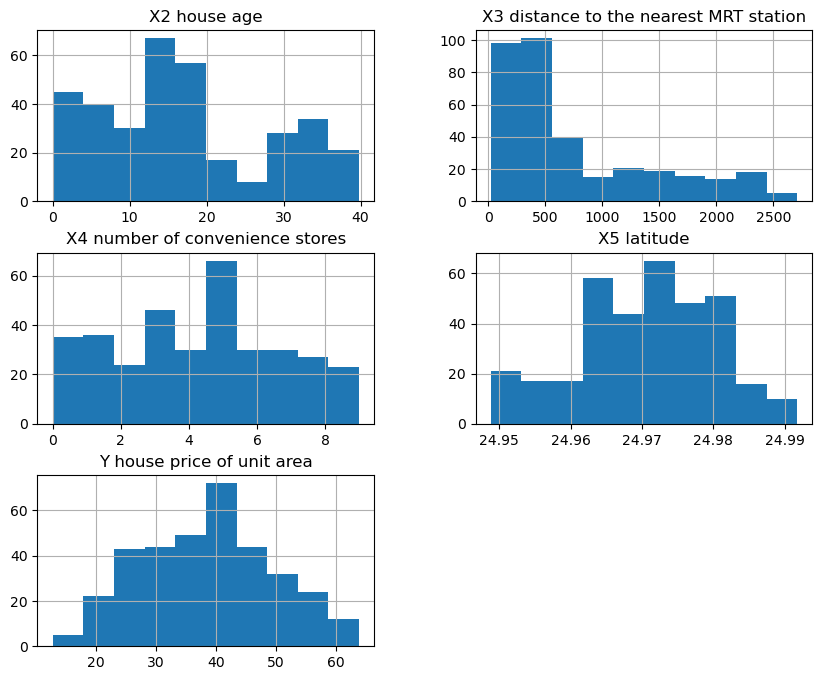

In [12]:
pre_r_df.hist(figsize=(10, 8))

### 선형

In [13]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    # print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
    #       .format(MSE, RMSE, R2))
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features, targets = pre_r_df.iloc[:, :-1], pre_r_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [15]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 33.2448, RMSE: 5.7658, MSLE: 0.0241, RMSLE: 0.1552, R2: 0.6773


#### 다항회귀

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

features, targets = pre_r_df.iloc[:, :-1], pre_r_df.iloc[:, -1]

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [17]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 32.0170, RMSE: 5.6584, MSLE: 0.0208, RMSLE: 0.1442, R2: 0.6892


### 비선형

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

features, targets = pre_r_df.iloc[:, :-1], pre_r_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 67.9218, RMSE: 8.2415, MSLE: 0.0409, RMSLE: 0.2023, R2: 0.3408
RandomForestRegressor
MSE: 36.6982, RMSE: 6.0579, MSLE: 0.0221, RMSLE: 0.1488, R2: 0.6438
GradientBoostingRegressor
MSE: 35.3018, RMSE: 5.9415, MSLE: 0.0217, RMSLE: 0.1474, R2: 0.6574
XGBRegressor
MSE: 42.1881, RMSE: 6.4952, MSLE: 0.0252, RMSLE: 0.1587, R2: 0.5905
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 236
[LightGBM] [Info] Number of data points in the train set: 277, number of used features: 4
[LightGBM] [Info] Start training from score 38.796029
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train_train, X_val_train, X_train_train, y_val_test = \
train_test_split(X_train, y_train, test_size=0.2, random_state=124)

# 교차검증 수행
cv_scores_train = cross_val_score(lgb_r, X_train, y_train, cv=10, scoring='r2')
cv_scores_test = cross_val_score(lgb_r, X_test, y_test, cv=10, scoring='r2')

# 훈련 세트와 테스트 세트 간의 성능 차이 계산
mean_train_score = cv_scores_train.mean()
mean_test_score = cv_scores_test.mean()

# mean_train_score = -1 * mean_train_score
# mean_test_score = -1 * mean_test_score

print('훈련 데이터세트의 MSE평균:', mean_train_score)
print('검증 데이터세트의 MSE평균 :', mean_test_score)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 214
[LightGBM] [Info] Number of data points in the train set: 249, number of used features: 4
[LightGBM] [Info] Start training from score 38.862249
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

#### feature 2개 삭제 후의 R2 score가 이전 보다 조금 더 낮아진 것을 확인했다.

| Model                    | R2 (전) | R2 (후) |
|--------------------------|-----------|----------|
| 선형 회귀  | 0.6887    | 0.6773   |
| 비선형 회귀  | 0.7458    | 0.6892   |

| Model                    | R2 (전) | R2 (후) |
|--------------------------|-----------|----------|
| DecisionTreeRegressor    | 0.4561    | 0.3408  |
| RandomForestRegressor    | 0.6928    | 0.6438   |
| GradientBoostingRegressor| 0.6958    | 0.6574   |
| XGBRegressor             | 0.5995    | 0.5905   |
| LGBMRegressor            | 0.7266    | 0.6956   |

### 🆕 성능을 향상 시키고자 전처리를 다시 해보고자 한다. (4 Cycle)
- feature 분포 확인하기

In [20]:
import numpy as np

pre_r_df['X3 distance to the nearest MRT station'] = np.log1p(pre_r_df['X3 distance to the nearest MRT station'])

array([[<Axes: title={'center': 'X2 house age'}>,
        <Axes: title={'center': 'X3 distance to the nearest MRT station'}>],
       [<Axes: title={'center': 'X4 number of convenience stores'}>,
        <Axes: title={'center': 'X5 latitude'}>],
       [<Axes: title={'center': 'Y house price of unit area'}>, <Axes: >]],
      dtype=object)

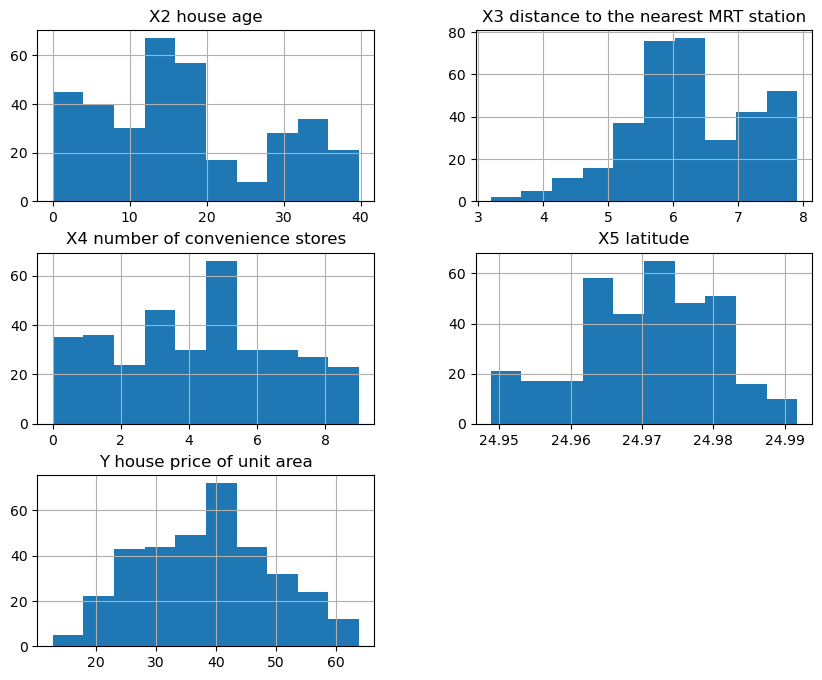

In [21]:
pre_r_df.hist(figsize=(10, 8))

In [22]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    R2 = r2_score(y_test, prediction)
    # print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
    #       .format(MSE, RMSE, R2))
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE, R2))

In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

features, targets = pre_r_df.iloc[:, :-1], pre_r_df.iloc[:, -1]

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [24]:
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

MSE: 28.8115, RMSE: 5.3676, MSLE: 0.0188, RMSLE: 0.1371, R2: 0.7204


In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

features, targets = pre_r_df.iloc[:, :-1], pre_r_df.iloc[:, -1]

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=10)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 72.3276, RMSE: 8.5046, MSLE: 0.0412, RMSLE: 0.2030, R2: 0.2980
RandomForestRegressor
MSE: 36.7889, RMSE: 6.0654, MSLE: 0.0221, RMSLE: 0.1487, R2: 0.6429
GradientBoostingRegressor
MSE: 30.1177, RMSE: 5.4880, MSLE: 0.0188, RMSLE: 0.1371, R2: 0.7077
XGBRegressor
MSE: 48.7308, RMSE: 6.9807, MSLE: 0.0282, RMSLE: 0.1679, R2: 0.5270
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 934
[LightGBM] [Info] Number of data points in the train set: 277, number of used features: 14
[LightGBM] [Info] Start training from score 38.796029
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

#### 👉 feature의 분포를 정규 분포에 가까워지게끔 로그를 사용하여 조정 + 다항회귀 사용하였더니 모델의 수치가 오른 것을 볼 수 있었다. 

| Model                    | R2 (로그 전) | R2 (로그 후) |
|--------------------------|-----------|----------|
| 다항 회귀  | 0.6892    | 0.7204   |

### 교차 검증을 통해 과적합된 모델인지 평가

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train_train, X_val_train, X_train_train, y_val_test = \
train_test_split(X_train, y_train, test_size=0.2, random_state=124)

# 교차검증 수행
cv_scores_train = cross_val_score(gb_r, X_train, y_train, cv=10, scoring='r2')
cv_scores_test = cross_val_score(gb_r, X_test, y_test, cv=10, scoring='r2')

# 훈련 세트와 테스트 세트 간의 성능 차이 계산
mean_train_score = cv_scores_train.mean()
mean_test_score = cv_scores_test.mean()

# mean_train_score = -1 * mean_train_score
# mean_test_score = -1 * mean_test_score

print('훈련 데이터세트의 MSE평균:', mean_train_score)
print('검증 데이터세트의 MSE평균 :', mean_test_score)

훈련 데이터세트의 MSE평균: 0.7121780957805126
검증 데이터세트의 MSE평균 : 0.51268670635944


#### 👉 두 데이터 세트의 수치의 평균에 차이가 거의 없었다.
- 다중 공산성이 높은 feature들을 삭제한 후, 훈련을 진행한 결과 과적합이 이전보다 많이 해소된 것을 볼 수 있었다.
- 아래는 데이터 세트별, MSE 평균 수치를 나타낸 표이다. 

| 데이터 세트               | feature 삭제 전, Lasso 사용 전 | feature 삭제 전, Lasso 사용 후 | feature 삭제 후 |
|--------------------------|-----------|----------|----------|
| 훈련 데이터  | 30.7470    | 44.9638   | 33.3800   |
| 테스트 데이터  | 130.9101    | 44.0829   | 34.2541   |

- 아래는 다항회귀를 사용하여 훈련한 모델의 R2 score를 cycle별로 나타낸 표이다.

| Cycle               | R2 |
|--------------------------|-----------|
| 1C  | 0.6489    |
| 2C(이상치 제거)  | 0.7458    |
| 3C(Lasso)  | 0.7059    |
| 3C(feature 삭제)  | 0.6892    |
| 4C(로그)  | 0.7204    |8

MSE: 29.1657, RMSE: 5.4005, MSLE: 0.0190, RMSLE: 0.1377, R2: 0.7677


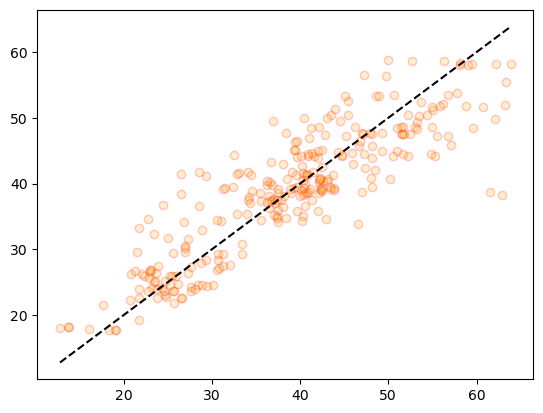

In [27]:
import matplotlib.pyplot as plt

l_r.fit(X_train, y_train)
prediction = l_r.predict(X_train)
get_evaluation(y_train, prediction)

fig, ax = plt.subplots()
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.show()

MSE: 28.8115, RMSE: 5.3676, MSLE: 0.0188, RMSLE: 0.1371, R2: 0.7204


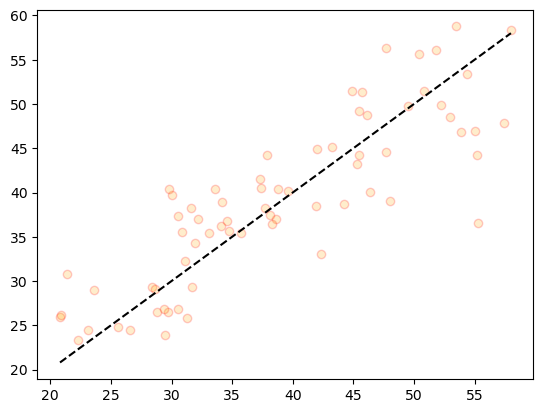

In [28]:
import matplotlib.pyplot as plt

l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)
get_evaluation(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

In [29]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

l_r = LinearRegression()

kfold = KFold(n_splits=10, shuffle=True)

scores = cross_val_score(l_r, X_train, y_train, cv=kfold, scoring='r2')
for score in scores:
    print(f'{np.round(score, 4)}')

0.7247
0.8572
0.6471
0.7513
0.6614
0.7118
0.5887
0.7485
0.8174
0.6698


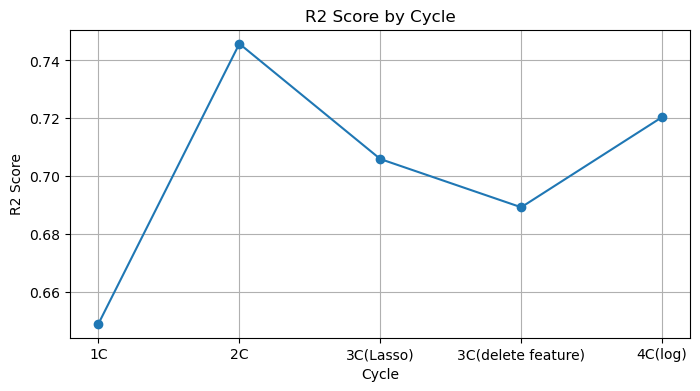

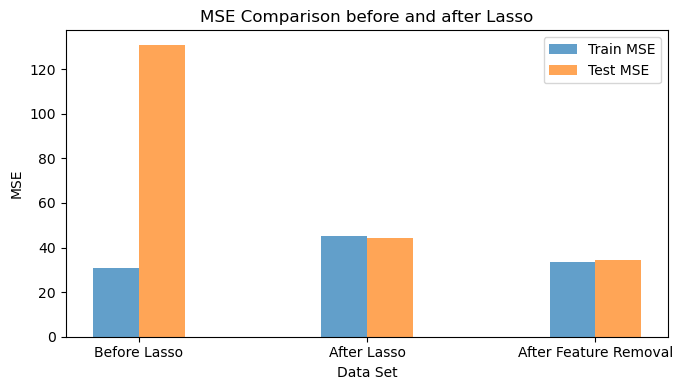

In [30]:
import matplotlib.pyplot as plt

# R2 score 시각화
cycles = ['1C', '2C', '3C(Lasso)', '3C(delete feature)', '4C(log)']
r2_scores = [0.6489, 0.7458, 0.7059, 0.6892, 0.7204]

plt.figure(figsize=(8, 4))
plt.plot(cycles, r2_scores, marker='o', linestyle='-')
plt.title('R2 Score by Cycle')
plt.xlabel('Cycle')
plt.ylabel('R2 Score')
plt.grid(True)
plt.show()

import matplotlib.pyplot as plt
import numpy as np

# 데이터
train_mse = [30.7470, 44.9638, 33.3800]
test_mse = [130.9101, 44.0829, 34.2541]
labels = ['Before Lasso', 'After Lasso', 'After Feature Removal']

# 막대 그래프 인덱스
x = np.arange(len(labels))  

# 그래프 크기 설정
plt.figure(figsize=(7, 4))

# 훈련 데이터 세트의 MSE를 나타내는 막대 그래프
plt.bar(x - 0.1, train_mse, width=0.2, label='Train MSE', alpha=0.7)

# 테스트 데이터 세트의 MSE를 나타내는 막대 그래프
plt.bar(x + 0.1, test_mse, width=0.2, label='Test MSE', alpha=0.7)

# 그래프 제목, 라벨, 범례 설정
plt.title('MSE Comparison before and after Lasso')
plt.xlabel('Data Set')
plt.ylabel('MSE')
plt.xticks(x, labels)
plt.legend()

# 그래프 표시
plt.tight_layout()
plt.show()

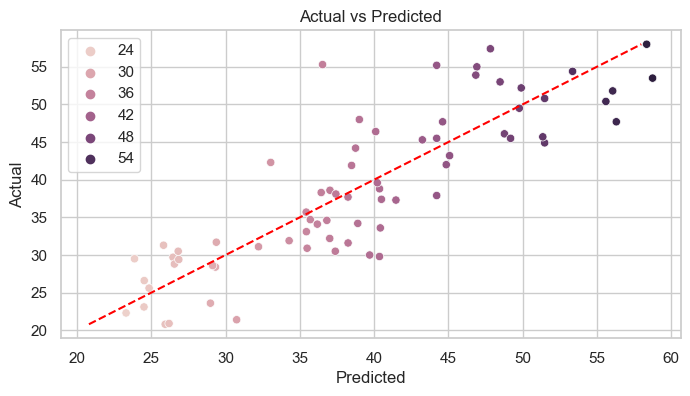

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
fig, ax = plt.subplots(ncols=1, figsize=(8, 4))
ax.set_title('Actual vs Predicted')
sns.scatterplot(x=np.ravel(prediction), y=y_test, ax=ax, hue=np.ravel(prediction))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### 📍 아래는 1 cycle 부터 마지막 훈련 모델까지 실제값과 예측값을 비교한 그래프이다.
과적합이 해결되며 처음에 비해 성능이 올라가는 것을 확인할 수 있다.

- 1 Cycle

<img src="./images/first.png" width="600px">

- 2Cycle(Lasso 사용하기 전 과적합 있을 때)
  
<img src="./images/before_lasso.png" width="600px">

- 2 Cycle(Lasso 사용 후 과적합 해소 되었을 때)
  
<img src="./images/after_lasso.png" width="600px">

- 3 Cycle(feature 삭제 후, log 사용 후)
  
<img src="./images/feature_del_after_log.png" width="600px">